In [1]:
import pandas as pd
import numpy as np
# 对比两厂关键特征的统计量
def compare_stats(factory1_df, factory2_df, features):
    stats = []
    for feat in features:
        s1 = factory1_df[feat].describe()
        s2 = factory2_df[feat].describe()
        stats.append(pd.DataFrame({'Factory1': s1, 'Factory2': s2}))
    return pd.concat(stats, keys=features)


In [2]:
import sys
import os

sys.path.append(os.path.abspath('../src'))

In [3]:
from data_processor import DataProcessor
file_path = "../data/raw/data_factory_2.csv"
dp = DataProcessor(file_path)
dp.change_pivot('site_date_tz','param_name','display_value')
dp.drop_NA_with_feature(features=['PrimaryPressure','FeedTemperature'])
dp.rename_column_to_timestamp('site_date_tz')
dp.rename_column_to_feedflow('FeedFlowRate')
dp.rename_column_to_permeateflow('PermeateFlowRate')
dp.rename_column_to_feedpressure('PrimaryPressure')
dp.rename_column_to_concentrateflow('ConcentrateFlowRate')
from feature_engineering import FeatureEngineering
fe = FeatureEngineering(dp)
fe.generate_cross_features(drop_features=['Recovery', 'PermeateFlow', 'PermeateConductivity', 'PermeatePressure'])
fe.lag_engineer()
dp.df = fe.df
features =dp.df.columns.tolist()
factory2_df = dp.df

In [7]:
factory2_df

,timestamp,ConcentrateFlow,FeedConductivity,FeedFlow,FeedTemperature,MembraneDifferentialPressure,PermeateConductivity,PermeateFlow,PermeatePressure,FeedPressure,...,FeedPressure_lag_1,FeedPressure_lag_2,FeedPressure_lag_3,FeedPressure_lag_6,FeedPressure_lag_12,Recovery_lag_1,Recovery_lag_2,Recovery_lag_3,Recovery_lag_6,Recovery_lag_12
0,2023-05-01 00:00:00,NaN,228.875,436.5375,49.26563,67.18750,4.38750,343.6000,NaN,276.2813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-01 00:01:00,NaN,229.125,436.2750,49.20000,68.62500,4.38750,343.2875,NaN,276.5000,...,276.2813,NaN,NaN,NaN,NaN,78.74181,NaN,NaN,NaN,NaN
2,2023-05-01 00:02:00,NaN,228.750,436.0125,49.16250,68.40625,4.36875,343.1875,NaN,276.2500,...,276.5000,276.2813,NaN,NaN,NaN,78.70036,78.74181,NaN,NaN,NaN
3,2023-05-01 00:03:00,NaN,227.875,436.7625,49.20938,68.40625,4.36250,343.7000,NaN,276.5938,...,276.2500,276.5000,276.2813,NaN,NaN,78.72401,78.70036,78.74181,NaN,NaN
4,2023-05-01 00:04:00,NaN,227.000,437.0625,49.17188,67.00000,4.35000,343.9750,NaN,276.3750,...,276.5938,276.2500,276.5000,NaN,NaN,78.68590,78.72401,78.70036,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385439,2025-05-25 13:49:00,80.975,231.500,427.6875,56.45625,26.96875,4.53750,346.7125,NaN,272.0313,...,271.3125,269.9688,267.2500,247.1563,280.5313,81.22843,81.12627,81.12144,81.24294,80.91051
385440,2025-05-25 13:50:00,81.100,232.375,430.5375,56.23125,26.81250,4.53125,349.4375,NaN,272.5625,...,272.0313,271.3125,269.9688,256.8125,279.8438,81.05801,81.22843,81.12627,81.11131,81.06389
385441,2025-05-25 13:51:00,81.075,232.500,430.2000,56.37188,26.34375,4.54375,349.1250,NaN,272.8750,...,272.5625,272.0313,271.3125,263.0938,280.6250,81.16309,81.05801,81.22843,81.09369,80.89625
385442,2025-05-25 13:52:00,80.975,232.625,429.7500,56.30625,27.43750,4.53125,348.7750,NaN,274.6875,...,272.8750,272.5625,272.0313,267.2500,280.8750,81.17155,81.16309,81.05801,81.12144,80.92672


In [4]:
from data_processor import DataProcessor
file_path = "../data/raw/data_factory_1.xlsx"
dp = DataProcessor(file_path)
dp.change_pivot('timestamp','param_name','value')
dp.drop_NA_with_feature(features=['FeedFlow','FeedTemperature'])
dp.rename_column_to_timestamp('timestamp')
from feature_engineering import FeatureEngineering
fe = FeatureEngineering(dp)
fe.generate_cross_features(drop_features=['Recovery', 'PermeateFlow', 'PermeateConductivity', 'PermeatePressure'])
fe.lag_engineer()
dp.df = fe.df
features =dp.df.columns.tolist()
factory1_df = dp.df

In [8]:
factory1_df 

,timestamp,ConcentrateFlow,ConcentratePressure,DifferentialPressure,FeedConductivity,FeedFlow,FeedPressure,FeedTemperature,Permeate Pressure,PermeateConductivity,...,PermeateFlow_lag_1,PermeateFlow_lag_2,PermeateFlow_lag_3,PermeateFlow_lag_6,PermeateFlow_lag_12,Recovery_lag_1,Recovery_lag_2,Recovery_lag_3,Recovery_lag_6,Recovery_lag_12
0,2022-11-01 00:00:00,119.058464,254.427083,59.811424,238.884183,387.863646,273.325000,83.620000,33.441771,2.684261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-01 01:00:00,119.284861,254.408333,59.793070,239.050850,388.577708,273.159583,83.740000,33.405078,2.690898,...,269.623333,NaN,NaN,NaN,NaN,69.427135,NaN,NaN,NaN,NaN
2,2022-11-01 02:00:00,118.848508,254.044583,59.789896,239.117517,386.958541,272.952917,83.768333,33.316614,2.695333,...,270.177500,269.623333,NaN,NaN,NaN,69.401548,69.427135,NaN,NaN,NaN
3,2022-11-01 03:00:00,118.631324,253.052917,59.742965,239.234183,388.434167,271.841667,84.445000,33.036159,2.644088,...,269.188750,270.177500,269.623333,NaN,NaN,69.404638,69.401548,69.427135,NaN,NaN
4,2022-11-01 04:00:00,118.826094,254.352500,59.799096,239.217517,387.695000,273.296667,84.073333,33.177526,2.674923,...,270.778750,269.188750,270.177500,NaN,NaN,69.566374,69.404638,69.401548,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16558,2024-10-31 19:00:00,125.494205,256.768333,58.073313,294.468367,425.652395,274.579583,82.377917,33.324270,20.424674,...,298.942500,300.220833,300.457415,299.827500,300.042083,70.373616,70.469196,70.516486,70.411097,70.642472
16559,2024-10-31 20:00:00,125.228209,255.743750,57.892086,294.501700,424.630415,273.390417,82.037500,33.009817,20.466732,...,300.128125,298.942500,300.220833,300.974375,300.611458,70.494039,70.373616,70.469196,70.543881,70.681714
16560,2024-10-31 21:00:00,125.290890,256.068333,57.863168,294.535033,424.934480,273.846667,81.451667,33.089192,20.438021,...,299.301458,300.128125,298.942500,299.433125,300.092083,70.492748,70.494039,70.373616,70.442153,70.645953
16561,2024-10-31 22:00:00,125.739584,256.557083,57.940895,294.701700,426.029222,274.174167,81.792500,33.801588,20.491976,...,299.532500,299.301458,300.128125,300.457415,299.512500,70.492430,70.492748,70.494039,70.516486,70.390352


In [9]:
top_k_features = pd.read_csv("../data/temp_data/top_k_features_plant1.csv")
top_k_features = top_k_features.iloc[:,1].tolist()
top_k_features

['PermeateFlow_lag_1',
 'FeedFlow',
 'Recovery',
 'FeedConductivity_x_FeedFlow',
 'PermeateFlow_lag_2',
 'ConcentrateFlow_x_FeedFlow',
 'FeedFlow_x_FeedTemperature',
 'Recovery_lag_1',
 'PermeateFlow_lag_3',
 'FeedPressure']

In [10]:
print(compare_stats(factory1_df, factory2_df, top_k_features))

                              Factory1       Factory2
PermeateFlow_lag_1 count  16170.000000  344563.000000
                   mean     297.088208     341.903751
                   std        9.026627      24.681965
                   min      122.951250      -0.525000
                   25%      299.401719     343.587500
...                                ...            ...
FeedPressure       min      113.625000       0.000000
                   25%      254.668333     261.531300
                   50%      276.607917     300.875000
                   75%      296.876875     338.281300
                   max      352.161486     400.718800

[80 rows x 2 columns]


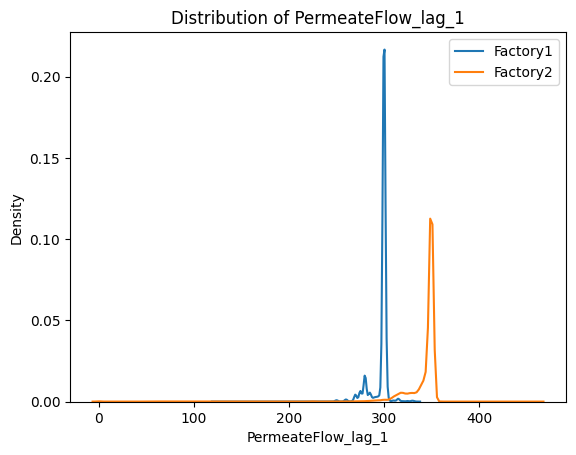

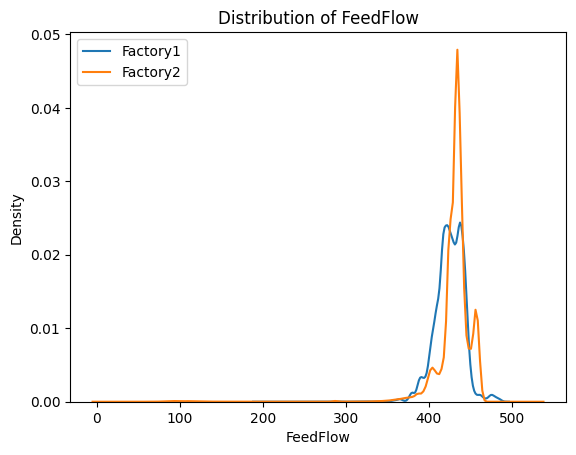

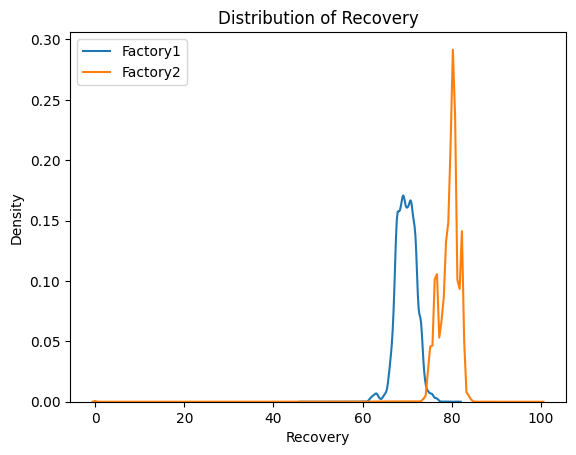

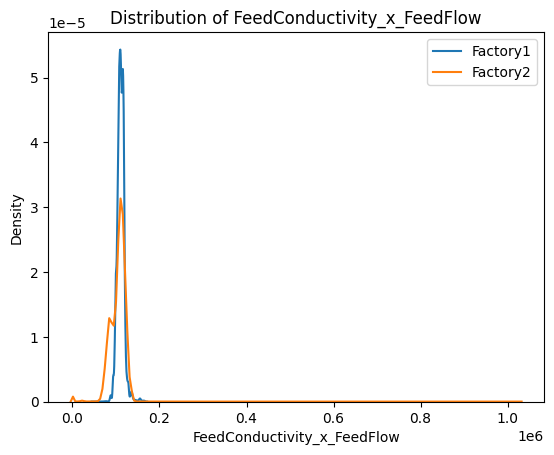

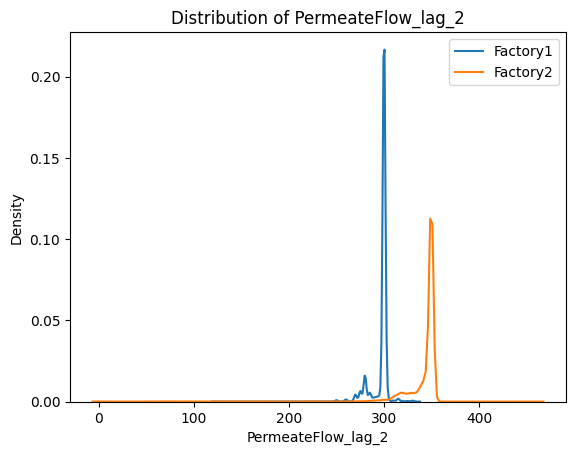

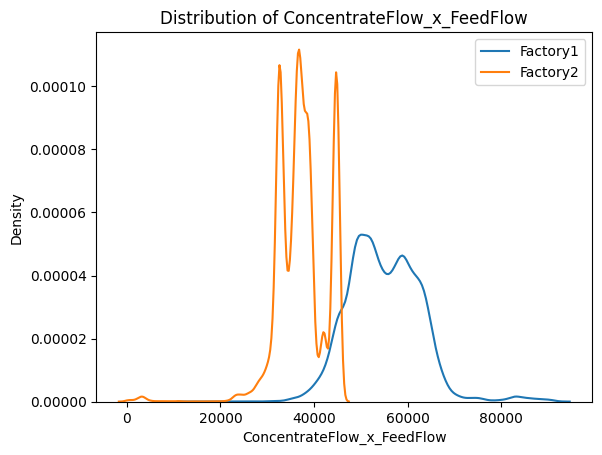

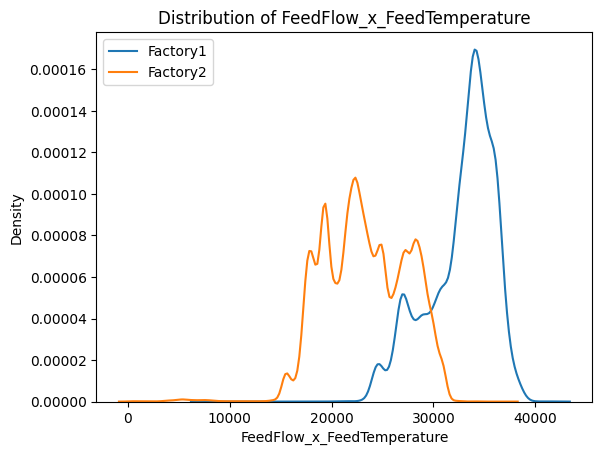

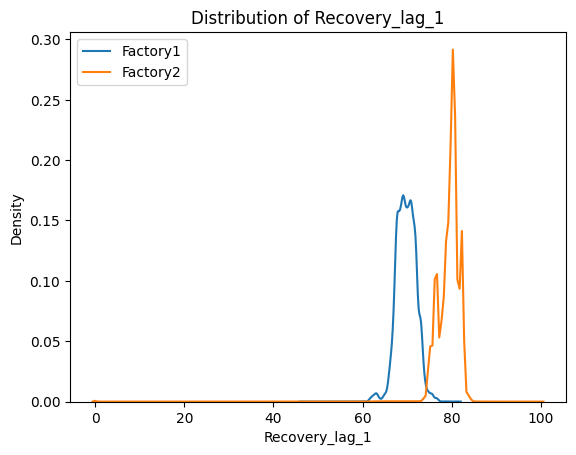

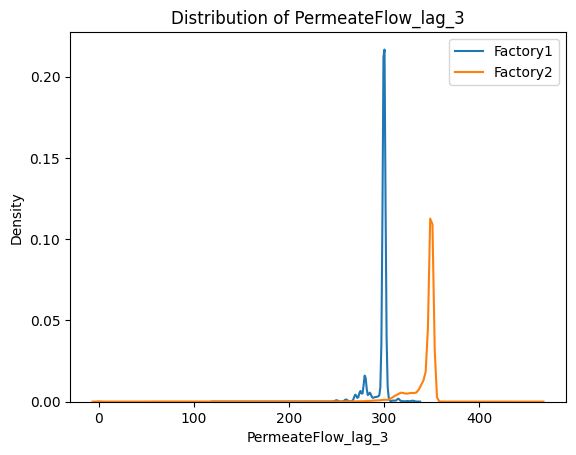

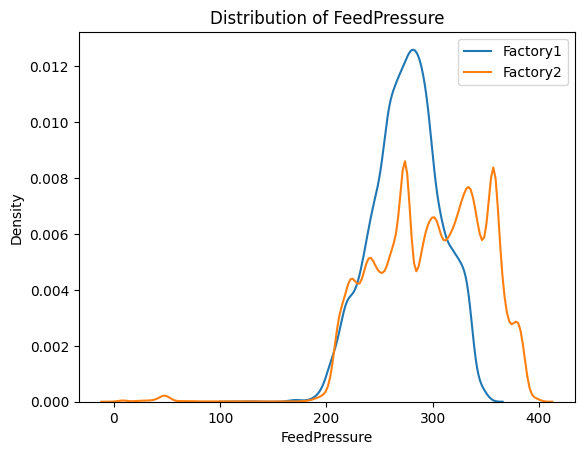

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
for feat in top_k_features:
    plt.figure()
    sns.kdeplot(factory1_df[feat], label='Factory1')
    sns.kdeplot(factory2_df[feat], label='Factory2')
    plt.title(f'Distribution of {feat}')
    plt.legend()